In [77]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

In [78]:
def load_dataset(dataset):
    dataset = pd.read_csv("googleplaystore.csv",index_col=None)
    return dataset

source = "googleplaystore.csv"
dataset = load_dataset(source)
dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [79]:
#Analysis
def print_summarize_dataset(dataset):
    print(dataset.describe())

print_summarize_dataset(dataset)

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


In [80]:
#clean the dataset for assessment: corelations - leaving only int in the dataframe
#keep: Rating, Reviews, Size, Installs, Price
def clean_dataset(dataset):
    #dataset_clean = dataset.loc[:,('Rating','Reviews','Size','Installs','Price')]
    dataset_clean = dataset
    dataset_clean['Size'] = dataset_clean['Size'].replace({'\D+':'0'},regex=True)
    dataset_clean['Installs'] = dataset_clean['Installs'].replace({'\D+':'0'},regex=True)
    dataset_clean['Reviews'] = dataset_clean['Reviews'].replace({'\D+':'0'},regex=True)
    dataset_clean['Price'] = dataset_clean['Price'].replace({'\D+':'0'},regex=True)
    dataset_clean = dataset_clean.astype({'Reviews':'int','Size':'int','Installs':'int64','Price':'int'})
    dataset_clean['Installs'] = dataset_clean['Installs']/1_000_000
    dataset_clean = dataset_clean.query("Price > 0")
    dataset_clean = dataset_clean.drop_duplicates(subset=['App'])
    print(dataset_clean.dtypes)
    return dataset_clean

dataset_clean = clean_dataset(dataset)

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs          float64
Type               object
Price               int32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [81]:
dataset_clean.describe()

,Rating,Reviews,Size,Installs,Price
count,604.000000,7.560000e+02,756.000000,756.000000,756.000000
mean,4.259603,8.724888e+03,1982.222222,55.203199,13247.371693
std,0.559961,8.988612e+04,2560.911537,537.017771,58738.924913
min,1.000000,0.000000e+00,0.000000,0.000000,99.000000
25%,4.100000,6.000000e+00,210.000000,0.001000,1049.000000
50%,4.400000,8.800000e+01,660.000000,0.100000,2099.000000
75%,4.600000,1.213750e+03,3040.000000,1.000000,4099.000000
max,5.000000,2.376564e+06,10200.000000,10000.000000,400000.000000


Find the weighted rating for the apps:
rev_weight = sum(reviews)/100


In [82]:
#calculating a ratings & review index using the bayesian-average

def bayesian_avg(dataset_clean):
    tot_weight = sum(dataset_clean['Reviews'])/100
    dataset_clean['rev_weight'] = dataset_clean['Reviews']/tot_weight
    dataset_clean['weighted_rate'] = dataset_clean['rev_weight']*dataset_clean['Rating']
    return dataset_clean.sort_values(['weighted_rate'],ascending=False)

bayesian_avg(dataset_clean)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev_weight,weighted_rate
2241,Minecraft,FAMILY,4.5,2376564,0,10000.00000,Paid,6099,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,36.030300,162.136351
4034,Hitman Sniper,GAME,4.6,408292,290,10000.00000,Paid,99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,6.189980,28.473907
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,260,1000.00000,Paid,6099,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,5.290497,23.278188
9678,Where's My Water?,FAMILY,4.7,188740,690,1000.00000,Paid,1099,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,2.861425,13.448696
8860,Bloons TD 5,FAMILY,4.6,190086,940,1000.00000,Paid,2099,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,2.881831,13.256422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,FN model 1900 pistol explained,BOOKS_AND_REFERENCE,NaN,0,8020,0.00010,Paid,6049,Everyone,Books & Reference,"September 5, 2015",Android 3.0 - 2015,1.6 and up,0.000000,NaN
10669,Pistolet FN GP35 expliqué,BOOKS_AND_REFERENCE,NaN,2,7090,0.00005,Paid,5099,Everyone,Books & Reference,"August 19, 2014",Android 2.0 - 2014,1.6 and up,0.000030,NaN
10674,Pistolet FN 1906 expliqué,BOOKS_AND_REFERENCE,NaN,0,5020,0.00010,Paid,5049,Everyone,Books & Reference,"August 17, 2014",Android 2.0 - 2014,1.6 and up,0.000000,NaN
10735,FP VoiceBot,FAMILY,NaN,17,1570,0.00100,Paid,99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,0.000258,NaN


In [85]:
#Calculate averages: installs / reviews; 
def average_inst_rev(dataset_clean):
    dataset_clean['Reviews'] = dataset_clean['Reviews'] + 1
    dataset_clean['Reviews'].
    dataset_clean['inst_rev'] = abs((dataset_clean['Reviews']-dataset_clean['Installs'])/dataset_clean['Installs'])/100
    dataset_clean['rev_inst'] = abs((dataset_clean['Installs']-dataset_clean['Reviews'])/dataset_clean['Reviews'])
    dataset_clean['users_engaged'] = 1-dataset_clean['rev_inst']
    return dataset_clean

average_inst_rev(dataset_clean)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,rev_weight,weighted_rate,inst_rev,rev_inst,users_engaged
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11444,6080,10.0000,Paid,4099,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,0.173468,0.815301,11.434,0.999126,0.000874
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10297,390,10.0000,Paid,4099,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,0.156079,0.749180,10.287,0.999029,0.000971
427,Puffin Browser Pro,COMMUNICATION,4.0,18249,0,10.0000,Paid,3099,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,0.276637,1.106547,18.239,0.999452,0.000548
476,"Moco+ - Chat, Meet People",DATING,4.2,1547,0,1.0000,Paid,3099,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,0.023423,0.098378,15.460,0.999354,0.000646
477,Calculator,DATING,2.6,59,6020,0.1000,Paid,6099,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,0.000864,0.002247,5.890,0.998305,0.001695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,19,1570,0.0010,Paid,99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,0.000258,NaN,189.990,0.999947,0.000053
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,37,2040,0.1000,Paid,7099,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,0.000531,0.002335,3.690,0.997297,0.002703
10782,Trine 2: Complete Story,GAME,3.8,254,110,1.0000,Paid,16099,Teen,Action,"February 27, 2015",2.22,5.0 and up,0.003820,0.014518,2.530,0.996063,0.003937
10785,"sugar, sugar",FAMILY,4.2,1407,9050,1.0000,Paid,1020,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up,0.021301,0.089463,14.060,0.999289,0.000711


ValueError: supplied range of [0.12605, inf] is not finite

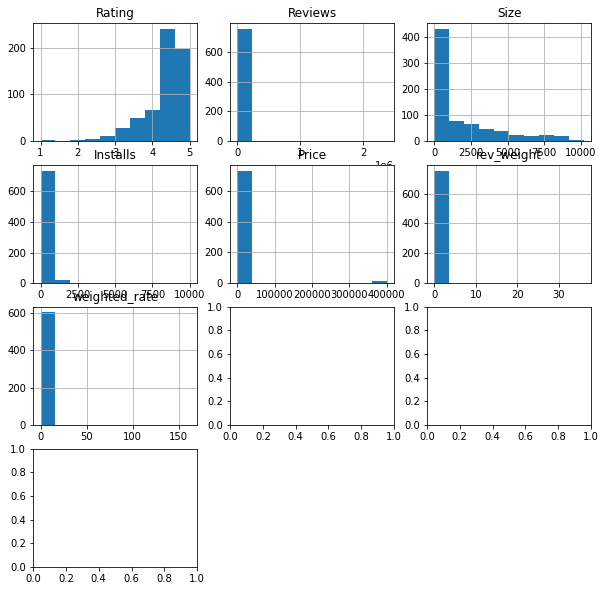

In [84]:
def print_histograms(dataset_clean):
    dataset_clean.hist(figsize=[10,10])
    pyplot.show()

print_histograms(dataset_clean)

{'Rating': 0.04827237084321853, 'Reviews': 0.8042408015688522, 'Size': -0.057369399204117905, 'Installs': 1.0, 'Price': -0.01850099936410019, 'rev_weight': 0.8042408015688516, 'weighted_rate': 0.8055669034748314}


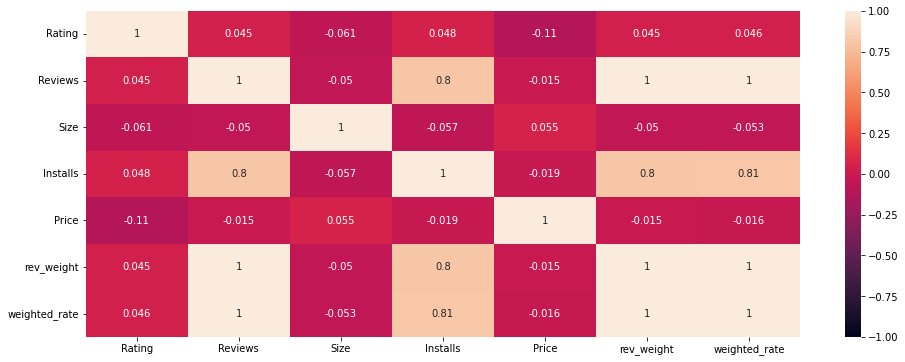

In [ ]:
#calculate the pearsons correlation coeficient of the dataset:
def compute_correlations_matrix(dataset):
    corr_df = dataset_clean.corr()
    #create a dictionarry from the coef table
    corelations = corr_df.to_dict(orient='dict')
    print(corelations['Installs'])
    pyplot.figure(figsize=(16, 6))
    sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True)

compute_correlations_matrix(dataset_clean)

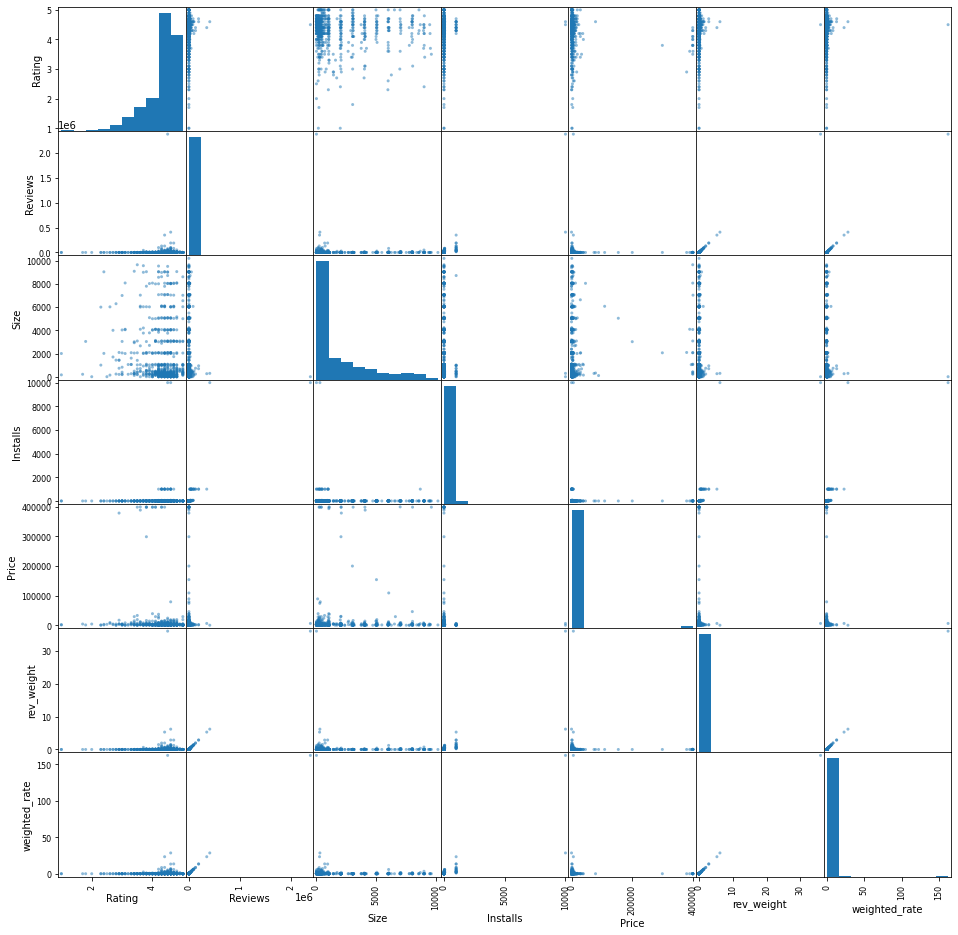

In [ ]:
def print_scatter_matrix(dataset_clean):
    pd.plotting.scatter_matrix(dataset_clean,figsize=([16,16]))

print_scatter_matrix(dataset_clean)

In [ ]:
#get unique values from the dataframe
print(dataset['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [ ]:
#Plot with bar diagram the most populars paid apps of Family category
def popular_apps(dataset_clean):
    popular_apps = dataset_clean.query("Category == 'FAMILY'")
    #popular_apps = dataset_clean.query("Price > 0")
    popular_apps = popular_apps[['App','weighted_rate','Installs']]
    popular_apps_wght = popular_apps.sort_values(by=['weighted_rate'], ascending=False)
    popular_apps_inst = popular_apps.sort_values(by=['Installs'], ascending=False)
    popular_apps_wght_t10 = popular_apps_wght.head(5)
    popular_apps_inst_t10 = popular_apps_inst.head(5)
    #pyplot.bar(popular_apps_wght_t10['weighted_rate'], height=1)
    print(popular_apps_wght_t10)
    print(popular_apps_inst_t10)

popular_apps(dataset_clean)


                             App  weighted_rate  Installs
2241                   Minecraft     162.136351   10000.0
9678           Where's My Water?      13.448696    1000.0
8860                 Bloons TD 5      13.256422    1000.0
2242  Card Wars - Adventure Time       8.448933    1000.0
6936                   Hitman GO       5.866033      50.0
                       App  weighted_rate  Installs
2241             Minecraft     162.136351   10000.0
8860           Bloons TD 5      13.256422    1000.0
6675  Infinity Dungeon VIP       1.421422    1000.0
4260     Cut the Rope GOLD       4.272495    1000.0
9678     Where's My Water?      13.448696    1000.0


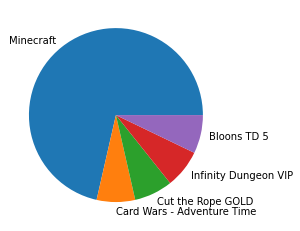

In [ ]:
#Plot with a pie diagram the most popular genres according to the number of installations from paid family

def popular_piechart(dataset_clean):
    pop_pie = dataset_clean.query("Category == 'FAMILY'")
    pop_pie = pop_pie[['App','Installs']]
    pop_pie = pop_pie.nlargest(n=5, columns=['Installs'])
    pyplot.pie(pop_pie['Installs'],labels=pop_pie['App'])

popular_piechart(dataset_clean)

In [ ]:
#Depending on each category, what are the ratio of download per app?: An array with the number of installation per category
def download_ratio(dataset_clean):
    dataset_sum = dataset_clean.groupby(['Category']).sum()
    #dataset_sum['dwnl_price'] = dataset_clean(['Price']).mean()/dataset_clean(['Installs']).mean()
    dataset_sum = dataset_sum[['Installs']]
    inst_arr = np.array(dataset_sum['Installs'])
    return dataset_sum.sort_values(by=['Installs'], ascending=False)

downl_ratio = download_ratio(dataset_clean)
downl_ratio

,Installs
Category,
GAME,18299.81965
FAMILY,15564.45814
PERSONALIZATION,2125.44794
PHOTOGRAPHY,1087.80740
TOOLS,1072.34441
COMMUNICATION,1035.82050
SPORTS,1024.30815
LIFESTYLE,1017.90110
PRODUCTIVITY,141.11055


In [ ]:
#What is the size of the market: Plot a pie with the number of installation per category # & %
def mark_size(downl_ratio):
    downl_ratio = downl_ratio.head(10)
    pyplot.pie(downl_ratio[['App']],downl_ratio['Installs'])
    pyplot.figure(figsize=(16, 16))
    print(downl_ratio)
    
mark_size(downl_ratio)

KeyError: "None of [Index(['App'], dtype='object')] are in the [columns]"

In [ ]:
#What is the size of the market: Plot a bar with the mean price per category # & %



In [ ]:
#Most expensive apps per category

In [ ]:
#Any additional information you will find useful for us to take the right decision.